**@author: Daniel Ramirez Guitron**

Date: 19/04/2025

Linkdin: https://www.linkedin.com/in/danielguitron/

Github: https://github.com/dannngu

E-mail: contactguitron@gmail.com

# ⚕️ Project: Schizophrenia Detection - Model Exploration
---


### Problem

The idea is to **train and validate a Random Forest classifier** that allows determining whether or not a person may have schizophrenia based on multiple psychosocial variables.


### Dataset
The dataset **schizophrenia.csv** contains a total of **5,610** records.

For each record (or person) we have the following information:

- `age`: the person's age
- `gender`: female (0) or male (1)
- `education`: primary (0), secondary (1), middle or high school (2), university (3), postgraduate (4)
- `marital_status`: single (0), married (1), divorced (2), widowed (3)
- `occupation`: unemployed (0), employed (1), retired (2), student (3)
- `ing_level`: low income (0), middle income (1), high income (2)
- `housing`: rural area (0), urban area (1)
- `family_history`: no relatives with schizophrenia (0), has had relatives with schizophrenia (1)
- `substance_use`: does not use tobacco, alcohol, or other substances (0), does use (1)
- `suicide_attempt`: no (0), yes (1)
- `social_environment_risk`: low (0), medium (1), high (2)
- `stress_factors`: low (0), medium (1), high (2)
- `medication_adherence`: low (0), moderate (1), good (2)

🎯 **Target Variable**
- `diagnosis`: does not have schizophrenia (0), has schizophrenia (1)


### Purpose phase
Explore and search for the best model to predict if a user have schizophrenia {0:no, 1:yes}


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [99]:
df_interim = pd.read_csv('../data/raw/schizophrenia.csv')

## **Train/test split**
---

To train the model we are going yo split the dataset using `train_test_split` from **Scikit-learn**. train(90%) and test(10%) out of bag. 

In [100]:
# Creation of the dataset train and test
from sklearn.model_selection import train_test_split

# X: input, Y: output to predict
X = df_interim.iloc[:, :-1] # Select all the varibales except the last one ('diagnosis')
Y = df_interim.iloc[:, -1] # Select only the las varible ('diagnosis')


# Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1234)

# Print the result sizes
print(f'[+] Train dataset: {X_train.shape, y_train.shape}')
print(f'[+] Test dataset: {X_test.shape, y_test.shape}')

[+] Train dataset: ((5049, 13), (5049,))
[+] Test dataset: ((561, 13), (561,))


## **Train the RandomForestClassifier**
---

Now it is time to select and create the models, in this case since the problem is logistic. a great model is **RandomForestClassifier** which also beacause the dataset is perfect we will not need to scale or encode the different varibles.
1. Create an intance of the model
2. Train the model using `fit()` and the train dataset

In [101]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    random_state=1234, 
    oob_score=True
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=1234)

> [!Note] The key of the above sterp is using `oob_score=True` that allow us to get the score of the samples **out-of-bag** to validate the performance of the model. as a type of validation dataset.

By default, because it is a classifier problem the score is **accuracy**:

In [102]:
# Socre of validation (samples out-of_bag)
rf_model.oob_score_

0.7767874826698357

**Observations**
- Baseline model: The model have an **accuracy** 77.67% of the validation dataset.

Let's see the number of trees that compose it, selected by **Scikit-learn** `estimators_`.

In [103]:
len(rf_model.estimators_)

100

Let's see the number of trees that make it up `estimators_[n].get_n_leaves()`.

In [104]:
# In this case we are looking the number of the tree [number]
rf_model.estimators_[50].get_n_leaves()

np.int64(1298)

The `oob_descion_function` attribute contains a function that allows us to determine the probability of classifying an **oob** data item into one category or another. (0, 1) in this case.

This matrix has the same number of rows as the training dataset, while the number of columns is the number of categories.

In [105]:
rf_model.oob_decision_function_.shape

(5049, 2)

> [!Note] We have **5049** data, and only 2 outputs. { 0 and 1} to know if you have schizophrenia

Let's look at the matrix in detail, where the largest value is the one that will have the greatest weight and how it will be classified in one or the other.

In [106]:
rf_model.oob_decision_function_

array([[0.03448276, 0.96551724],
       [0.5       , 0.5       ],
       [0.71875   , 0.28125   ],
       ...,
       [0.12195122, 0.87804878],
       [0.44444444, 0.55555556],
       [0.21212121, 0.78787879]], shape=(5049, 2))

We have previously seen that the default performance (**oob_score**) is **accuracy**.

In this case, since it is of a **medical** nature, the most important metrics are usually **precision** and **recall**, and the **oob_descion_fucntion** matrix can be used to calculate other metrics.

In this case:
- **Precision**: Determine the total number of people classified as schizophrenic, what percentage actually has schizophrenia.
- **Recall**: Determines the total number of people who **really** have schizophrenia, which percentage was correctly detected by the model.
- **F1_score**: It is the **harmonic** mean between **precision** and **recall**.

Let's calculate these three metrics with the help of **Scikit-Learn**

In [107]:
# Calculate precision and recall from oob_decison_function_
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# oob probabilities
oob_probs = rf_model.oob_decision_function_

# Convert prpabilities into the categories predicted
oob_preds = np.argmax(oob_probs, axis=1) # Select the highest probability

# Calculate precision, recall and f1_score
precision = precision_score(y_train, oob_preds)
recall = recall_score(y_train, oob_preds)
f1 = f1_score(y_train, oob_preds)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1_score: {f1:.3f}')

Precision: 0.799
Recall: 0.758
F1_score: 0.778


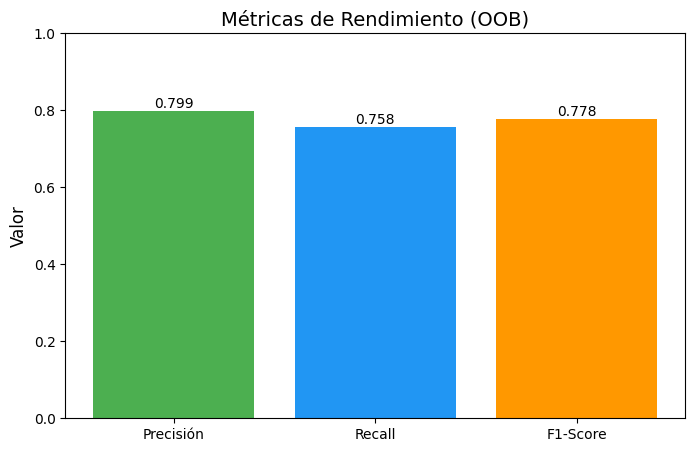

In [108]:
# Create a list with the names of the metrics and their values
metrics = ['Precisión', 'Recall', 'F1-Score']
values = [precision, recall, f1]

# Configure the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['#4CAF50', '#2196F3', '#FF9800'])

# Customize the chart
plt.title('Métricas de Rendimiento (OOB)', fontsize=14)
plt.ylim(0, 1)  # Y-axis limit between 0 and 1
plt.ylabel('Valor', fontsize=12)

# Add the numeric values ​​above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.3f}', ha='center', va='bottom')

plt.show()


**Observations**
- **Precision**: Around **80%**. This indicates that when the model predicts the category schizophrenia (1), it will be correct **80%** of the time. **20%** of the time, they will be false positives (non-schizophrenic patients as schizophrenic patients).
- **Recall**: Around **75%**. This indicates that, of the total number of patients with schizophrenia, the model correctly detects **75%**. In **35%** of cases, it fails to detect them.

## **Effect of hyper-parameters performance in RandomForestClassfier**
---


There are several hyper-parameters we can use to tweak performance.

In [109]:
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 1234, 'verbose': 0, 'warm_start': False}


The hyper-parameters that typically have the greatest impact are:
- `n_estimators`: Number of trees in the forest.
- `max_depth`: Maximum depth for each tree in the forest.
- `max_features`: Maximum number of features to randomly select for each tree in the forest.

Let's look at the impact of each of these hyperparameters on the performance of the forest model.
- We set different values ​​for each hyperparameter.
- For each value, we'll input the forest and calculate its performance (f1_score).
- Finally, we'll plot f1_score against each hyperparameter value.

Let's start with the `n_estimatnatos`

/Users/danguitron/Code/workspaces/public-space/projects-pbs/schizophrenia-prediction/venv/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


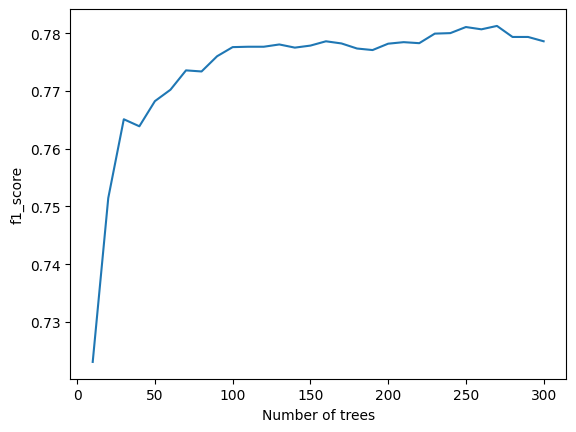

In [110]:
N_ESTIMATORS = np.arange(10, 301, 10)
f1_scores = []

for n_trees in N_ESTIMATORS:
    # print(f'Training with {n_trees} trees...')
    forest = RandomForestClassifier(
        n_estimators=n_trees,
        random_state=1234,
        oob_score=True
    )
    forest.fit(X_train, y_train)
    oob_probs = forest.oob_decision_function_
    oob_preds = np.argmax(oob_probs, axis=1)
    
    f1_scores.append(f1_score(y_train, oob_preds))
    
# Plot f1_scores vs. n_trees
plt.plot(N_ESTIMATORS, f1_scores)
plt.xlabel('Number of trees')
plt.ylabel('f1_score')
plt.show();
    

**Obsservations**
- **Performance**: Entre mas aroboles usamos para construir el bosque, mejor desempeño obtendremos. In this case we reach a very good perfomance around **200** to **300** trees. 

Forest models typically have between 100 and 300 trees.

Now it is time for hyperparameter `max_depth`

Text(0, 0.5, 'f1_score')

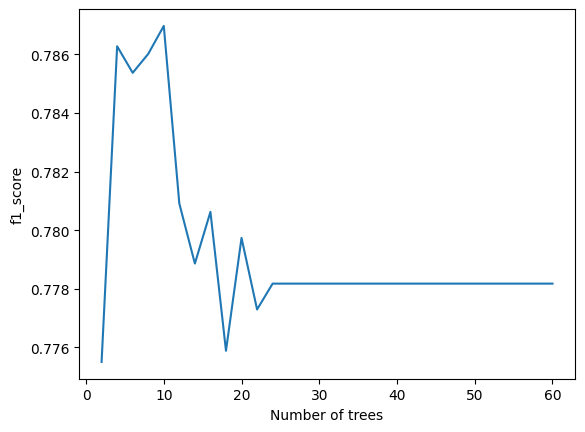

In [111]:
MAX_DEPTHS = np.arange(2, 61, 2)
f1_scores = []

for max_depth in MAX_DEPTHS:
    # print(f'Training with {max_depth}...')
    forest = RandomForestClassifier(
        n_estimators=200,
        max_depth=max_depth,
        random_state=1234,
        oob_score=True
    )
    forest.fit(X_train, y_train)
    oob_probs = forest.oob_decision_function_
    oob_preds = np.argmax(oob_probs, axis=1)
    
    f1_scores.append(f1_score(y_train, oob_preds))
    
# Plot f1_scores vs. n_trees
plt.plot(MAX_DEPTHS, f1_scores)
plt.xlabel('Number of trees')
plt.ylabel('f1_score')
    

**Observations**

The deeper the trees we build, even if they are different, the lower the performance will be.

This is because a deeper tree tends to be overfitted and therefore will not perform well on valid data. In the case of a forest, this translates into a forest with **poor** performance for **oob** samples.

In this case, we observe that performance does not decline too much, ranging from a
- High of almost **80%**
- Low of close to **78%**

For last but not leats, `max_features`

In general, a large tree (with a big depth and many leaves) can be prone to **overfitting**. It is generally recommended to reduce the complexity of the tree by adjusting its hyperparameters at the time of its creation.



Text(0, 0.5, 'f1_score')

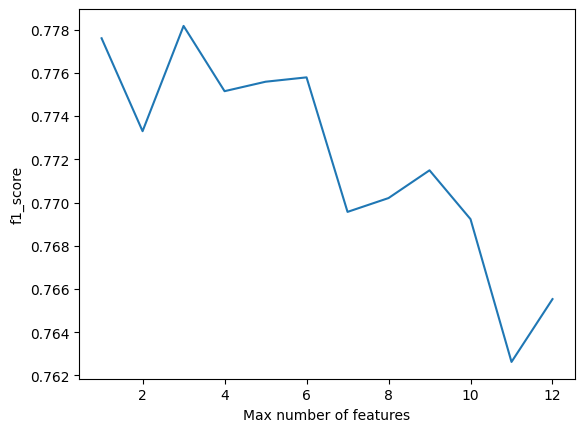

In [112]:
MAX_FEATURES = np.arange(1, len(X_train.columns))
f1_scores = []

for max_features in MAX_FEATURES:
    # print(f'Traning with max_features - {max_features}...')
    forest = RandomForestClassifier(
        n_estimators=200,
        max_features=max_features,
        random_state=1234,
        oob_score=True
    )
    
    forest.fit(X_train, y_train)
    oob_probs = forest.oob_decision_function_
    oob_preds = np.argmax(oob_probs, axis=1)
    
    f1_scores.append(f1_score(y_train, oob_preds))
    
# Plot f1_scores vs. max_features
plt.plot(MAX_FEATURES, f1_scores)
plt.xlabel('Max number of features')
plt.ylabel('f1_score')


**Observations**

- With less characteristics(features) selected aleatory to train each tree, the performance will be batter.

This beacuse when we train it with **few** features selcted aleatory, each tree will be more diverse and this diversity make the forest to have less **overfitting**(better perfromance)

### **Conslusions**

With the above steps we can conclude:
 - **Best hyperparameters**: The one that impact most in the perfomece is `n_estimartos`, variations betweeen **72%** and **78%** for **f1_Score**.
 - The effect of hyperparameters `max_depth` and `max_features` is marginal, they only present variations in performance between **77%** and **79%**.

## Predictions generation with the trained model
---

Now it is time to make the predictions with new data with the selected hyperparameters. To do so we use the **test dataset** with the method `predict()`

In [113]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=1234,
    oob_score=True
)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
display(rf_preds)

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,